# Basics of Quantum Computing

## 1.1: Quantum states and linear algebra
We introduce quantum states in the `bra-ket' notation. Every physical state $\ket{a}$ can be defined as an element of a complex Hilbert space $\mathcal{H}$. A hilbert space is just a normal vector space with an inner product which defines a distance function. Instead of using the vector notation we often write states in the computational basis which looks for single qubit, 2d hilbert space like
$$\ket{0} = \begin{pmatrix} 1 \\0\end{pmatrix}, \ket{1} = \begin{pmatrix} 0 \\1 \end{pmatrix}$$
Here $\ket{0}$ describes the ground state of a physical system and should not be confused with the vacuum state $0$. As in classic information theory the counting starts with zero.
For multiple qubits the basis is given by the product basis of the individual qubits. As an example we write the basis states of a 2 qubit system as:

$$\ket{00} = \ket{0} \otimes \ket{0}  = \begin{pmatrix} 1 \\0 \end{pmatrix}  \otimes \begin{pmatrix} 1 \\0\end{pmatrix} = \begin{pmatrix} 1 \\0 \\0\\0 \end{pmatrix}$$
$$\ket{01} = \ket{0} \otimes \ket{1}  = \begin{pmatrix} 1 \\0 \end{pmatrix}  \otimes \begin{pmatrix} 0 \\1\end{pmatrix} = \begin{pmatrix} 0 \\1 \\0\\0 \end{pmatrix}$$
$$\ket{10} = \ket{1} \otimes \ket{0}  = \begin{pmatrix} 0 \\1 \end{pmatrix}  \otimes \begin{pmatrix} 1 \\0\end{pmatrix} = \begin{pmatrix} 0 \\0 \\1\\0 \end{pmatrix}$$
$$\ket{11} = \ket{1} \otimes \ket{1}  = \begin{pmatrix} 0 \\1 \end{pmatrix}  \otimes \begin{pmatrix} 0 \\1\end{pmatrix} = \begin{pmatrix} 0 \\0 \\0\\1 \end{pmatrix}$$


While classically a state or a property measured can be described by a real valued number which can be in principle determined to an arbitrary precision, this is in general not true for a quantum state. The system can be instead thought of as being in a superposition of many possible measurement outcomes. If $\{\ket{a}\}$ is an eigenbasis of a measurement operator $\hat{A}$ which acts on the Hilbert space $\mathcal{H}$, we can describe every state $\ket{\Psi}$ as a superposition of those states.
\begin{align*}
    \ket{\Psi}= \sum_a c_i \ket{a}
\end{align*}
where $c_i$ are complex numbers $c_i \in \mathbb{C}$. 

## 1.2 The Bloch sphere and angles
The reason why we can represent any 2d state as a point of the Bloch sphere is that all quantum states need to be normed in order to fulfill that the probability of measuring some value sums up to 1, i.e. a state 
$$ \psi  = \alpha \ket{0} + \beta \ket{1}$$
has to be normalized
$$ ||\alpha||^2 + ||\beta||^2 = 1. $$
The other requirement is that global phase factos does not affect the physical measurement outcomes, i.e. for a real valued parameter $\Phi$ we have
$$e^{i \Phi} \ket{\Psi} \overset{\wedge}{=} \ket{\Psi}.$$
The Bloch vector for a quantum state of a two dimensional system can therefore (with spheric coordinates) defined as <br>
$$\ket{\psi} = \cos(\theta/2) \ket{0} + e^{i \phi} \sin(\theta/2) \ket{1}$$
where $\theta$ and $\phi$ are called the Bloch angles. The prefactor of $\ket{0}$ is choosen to be real to eliminate the physically irrelevant global phase factor.<br>

The Bloch vector is also the eigenstate $\ket{n}$ of the spin operator $$S_{\vec{n}} = \frac{\hbar}{2} \vec{n} \cdot \vec{\sigma}.$$ <br>
Where $\vec{\sigma}$ is a vector of the Pauli-Matrices
$$\sigma_x= X =\begin{pmatrix} 0 & 1\\1 &0 \end{pmatrix}, \sigma_y  = Y=  \begin{pmatrix} 0 & -i\\i &0 \end{pmatrix}, \sigma_z = Z= \begin{pmatrix} 1 & 0  \\0 & -1 \end{pmatrix}$$
and the 2x2 identity is often defined as the 0th Pauli-Matrix $\sigma_0$.




### Exercise:
We create a plot that shows a qubit in the Bloch-Sphere representation starting in a $\ket{0}$-state using the qiskit function "plot_bloch_vector()".<br>
Therefore we write a function that transfers a complex 2d-state into a point on the surface of the Bloch-Sphere by returning its cartesian coordinates [x,y,z]. <br>
After that we create a plot containing the Bloch-Sphere and the folowing state vector inside <br>

1. $$\ket{1}$$
2. $$\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})$$
3.  $$\frac{1}{\sqrt{2}}(\ket{0}-i\ket{1})$$
4. $$\frac{1}{\sqrt{2}} \left(\begin{array}{c} i\\1\\ \end{array} \right)$$

In [1]:
### imports
### %%capture                       
### captures stdout,stderr and Ipython's rich display() calls 
# %matplotlib inline             
#enables showing normal figures in the note book

# useful additional packages
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy import linalg

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, transpile
from qiskit import BasicAer, IBMQ, Aer, transpile


# import basic plot tools
from qiskit.tools.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization.bloch import Bloch
from qiskit.visualization.exceptions import VisualizationError
from qiskit.tools.visualization import plot_histogram


backend = BasicAer.get_backend('qasm_simulator')

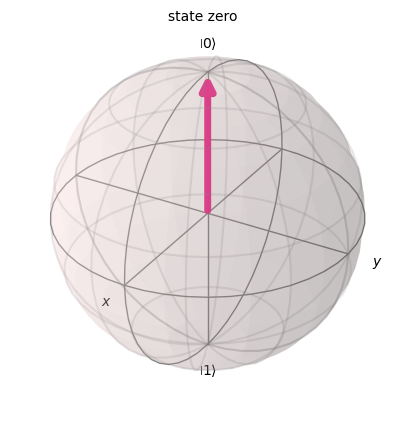

In [2]:
#### Solution
def calc_location(state):
    phi=np.angle(state[1])-np.angle(state[0])
    theta=2*np.arccos(np.abs(state[0]))
    x=np.sin(theta)*np.cos(phi)
    y=np.sin(theta)*np.sin(phi)
    z=np.cos(theta)
    return [x,y,z]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection="3d")

plot_bloch_vector(calc_location(np.array([1,0])), title="state zero", ax=ax)
# plot_bloch_vector(calc_location(np.array([0,1])), title="state one", ax=ax)
# plot_bloch_vector(calc_location(1/np.sqrt(2)*np.array([1,1])), title="state x plus", ax=ax)
# plot_bloch_vector(calc_location(1/np.sqrt(2)*np.array([1,-1j])), title="state y minus", ax=ax)
# plot_bloch_vector(calc_location(1/np.sqrt(2)*np.array([1j,1])), title="state y minus", ax=ax) ###showing that global phases are irrelevant

plt.show()

## 1.3 Rotations on the Bloch Sphere
All operations we can do with a single qubit are described by rotations of the state vector on the Bloch sphere. In general the formular for doing any rotation with rotation angle $\alpha$ around the axis $K$ is given by $$R_{K}(\alpha)= \exp(-i \frac{\alpha}{2} K)$$ where $K \in \{X,Y,Z\}$. <br> 
Be aware of the factor $\frac{1}{2}$ here.

### Exercise
We want to visualize a rotation of the Bloch vekto by 90° around the x-axis. Therefore we multiply our initial state (assume we start in the ground state $\ket{\psi(0)}=\ket{0}$) with the corresponding rotation matrix $$R_{X90}=\exp(-i \frac{\pi}{4} X t)$$
for each time step with a time parameter $t \in [0,1]$. Where we sampled over 50 points in time. <br> 
The state at time t is then given by
$$\ket{\psi(t)} = \exp(-i \frac{\pi}{4} X t) \ket{\psi(0)}$$



In [3]:
%matplotlib notebook
%matplotlib notebook

###Solution
times = np.linspace(0,1,50)
# X = np.array([[0,1],[1,0]])
# dUs=[linalg.expm(1j*t*X*np.pi/4) for t in times]
Y = np.array([[0,-1j],[1j,0]])
dUs=[linalg.expm(1j*t*Y*np.pi/4) for t in times]
# Z = np.array([[1,0],[0,-1]])
# dUs=[linalg.expm(1j*t*Z*np.pi/4) for t in times]


groundstate=np.array([1, 0])
# plus_state=1/np.sqrt(2)*np.array([1,1])

states=dUs @ groundstate
# states=dUs @ plus_state

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
sphere=Bloch(axes=ax)

def animate(i):
    sphere.clear()
    sphere.add_vectors(calc_location(states[i]))
    sphere.make_sphere()
    return ax

def init():
    sphere.vector_color=['r']
    return ax

ani=animation.FuncAnimation(
    fig, 
    animate,
    np.arange(len(states)),
    init_func=init,
    blit = False, 
    repeat = False
)
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

## 1.4 Circuit notations

Any gate based quantum algorithm can be written as a quantum circuit. A quantum circuit contains three essential elements 
- the qubits, operational and ancilla, and its classical counterparts
- the quantum operations called gates which can be in principal any unitary operation we can think of (normally decomposed in some sort of standard gates)
- a greater non-unitary operation group where we can place measurements, classical conditioned operations and more in 

We define the width of a circuit as the number of qubits in it and refer to its depth as the number of (simultaneous) operations in the time domain.
<br><br>
The gates can again be divided in two main groups <br>
- single qubit operations which contain $X, Y, Z, T, S, H, R_K(\alpha)$ and any other 2x2 unitary
- multi qubit gates such as controlled operations $CX, CY, CZ$ and zero-controlled operations (X before and behind the control qubit)
  controlled here means that only if the control qubit is in $\ket{1}$ the desired gate (for exmaple X) is applied to the target qubit, while
  a zero-contolled operation apllies the gate on the target only if the control qubit is in state $\ket{0}$

However, keep in mind that all operations can be decomposed in some controlled standard operation for example controlled $X$ plus single quibt gates.
As an examle we now look at a cirquit which has all basic ingredients of a quantum algorithm. 





In [4]:
###Example circuit

n = 2  ### number of qubits

qc = QuantumCircuit(n, 1)

qc.h(0)

###zero controlled not
qc.x(0)
qc.cx(0, 1)
qc.x(0)

###some operations
qc.barrier()
qc.rz(np.pi, range(2))
qc.barrier()

### reverse ordered beginning
qc.x(0)
qc.cx(0, 1)
qc.x(0)

qc.h(0)

### measurement
qc.measure(0, 0)
qc.draw()

┌───┐┌───┐     ┌───┐ ░ ┌───────┐ ░ ┌───┐     ┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ Rz(π) ├─░─┤ X ├──■──┤ X ├┤ H ├┤M├
     └───┘└───┘┌─┴─┐└───┘ ░ ├───────┤ ░ └───┘┌─┴─┐└───┘└───┘└╥┘
q_1: ──────────┤ X ├──────░─┤ Rz(π) ├─░──────┤ X ├───────────╫─
               └───┘      ░ └───────┘ ░      └───┘           ║ 
c: 1/════════════════════════════════════════════════════════╩═
                                                             0

The symmetries in time are typical for quantum algorithms we first entangle all qubits, apply our operation and deentangle them again to read out the result.

## Overview single qubit operations
### X-Gate (bit flip)
$$ X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$
### Y-Gate (phase and bit flip)
$$ Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$
### Z-Gate (phase and bit flip)
$$ Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$
### S-Gate $(\sqrt Z)$
$$S=\begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}$$
### T-Gate $(\sqrt S)$
$$T=\begin{pmatrix} 1 & 0 \\ 0 & e^{i \frac{\pi}{4}} \end{pmatrix}$$
### Rotation around X
$$R_x(\Theta)=\begin{pmatrix} \cos(\Theta /2) & -i \sin(\Theta/2) \\ -i \sin(\Theta / 2) & \cos(\Theta/2) \end{pmatrix}$$
### Rotation around Y
$$R_y(\Theta)=\begin{pmatrix} \cos(\Theta /2) &  -\sin(\Theta/2) \\ i \sin(\Theta / 2) & \cos(\Theta/2) \end{pmatrix}$$
### Rotation around Z
$$R_z(\Theta)=\begin{pmatrix} e^{i \Theta /2} & 0 \\ 0 & e^{i \Theta/2} \end{pmatrix}$$
### Hadamard Gate (used for creating superposition)
$$H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

## Single qubit example circuit

In [5]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)

qc.h(q) ###Here hadamard gate replace h(q) with {x,y,z,s,t}(q) or {rx(\Theta, q),ry(\Theta, q),rz(\Theta, q)} for other single qubit gates
# qc.x(q)
# qc.y(q)
# qc.t(q)
backend = BasicAer.get_backend("statevector_simulator")
job = execute(qc, backend, shots = 10)
result = job.result()
statevector=result.get_statevector()

print(statevector)
qc.draw()

[0.70710678+0.j 0.70710678+0.j]


┌───┐
q0: ┤ H ├
    └───┘

## Exercise:
Create multiple single quantum circuits which produces the following states as output
- $\ket{0}$
- $\ket{1}$
- $\ket{-} =\ket{0}-\ket{1}$
- $\ket{L} =\ket{-i}=\ket{0}-i \ket{1}$

Hint: For some of them are more than one standard operation required.

In [6]:
###solutions 
q = QuantumRegister(1)

### create |0>
qc = QuantumCircuit(q)
qc.id(q) 
qc.draw()

backend = BasicAer.get_backend("statevector_simulator")
job = execute(qc, backend, shots = 10)
result = job.result()
statevector=result.get_statevector()
print(statevector)

# ### create |1>
# qc = QuantumCircuit(q)
# qc.x(q) 
# qc.draw()

# backend = BasicAer.get_backend("statevector_simulator")
# job = execute(qc, backend, shots = 10)
# result = job.result()
# statevector=result.get_statevector()
# print(statevector)

# ### create |->
# qc = QuantumCircuit(q)
# qc.h(q) 
# qc.z(q)
# qc.draw()

# backend = BasicAer.get_backend("statevector_simulator")
# job = execute(qc, backend, shots = 10)
# result = job.result()
# statevector=result.get_statevector()
# print(statevector)

# ### create |L>
# qc = QuantumCircuit(q)
# qc.h(q) 
# qc.s(q)
# qc.z(q)
# qc.draw()

# backend = BasicAer.get_backend("statevector_simulator")
# job = execute(qc, backend, shots = 10)
# result = job.result()
# statevector=result.get_statevector()
# print(statevector)


[1.+0.j 0.+0.j]


## Overview Multi Qubit operations
### CNOT-Gate
$$C_X = \begin{pmatrix} 1&0&0&0 \\ 0 & 1 & 0 & 0 \\ 0 &0 &0 & 1\\ 0 &0 &1 & 0 \end{pmatrix}$$
### Controlled Y-Gate
$$C_Y = \begin{pmatrix} 1&0&0&0 \\ 0 & 1 & 0 & 0 \\ 0 &0 &0 &-i \\ 0 &0 &i & 0 \end{pmatrix}$$
### Controlled Z-Gate
$$C_Z = \begin{pmatrix} 1&0&0&0 \\ 0 & 1 & 0 & 0 \\ 0 &0 &1 & 0\\ 0 &0 &0 & -1 \end{pmatrix}$$
### Controlled Phase Rotation
$$C_P = \begin{pmatrix} 1&0&0&0 \\ 0 & 1 & 0 & 0 \\ 0 &0 &1 & 0\\ 0 &0 &0 & e^{i \lambda} \end{pmatrix}$$
### SWAP
$$SWAP = \begin{pmatrix} 1&0&0&0 \\ 0 & 0 & 1 & 0 \\ 0 &1 &0 & 0\\ 0 &0 &0 & 1 \end{pmatrix}$$


### Exercise: Testing the Bell inequality
#### Part 1:
Create a quantum citcuit which produces all four Bell states from $\ket{00}, \ket{01}, \ket{10}, \ket{11}$. A Bell state here is a maximally entangled two qubit vector which has the form
$$ \ket{\Phi^{\pm}} =  \frac{1}{\sqrt{2}} (\ket{00} \pm \ket{11})$$
or 
$$ \ket{\Psi^{\pm}} =  \frac{1}{\sqrt{2}} (\ket{01} \pm \ket{10})$$
Run the circuit and get the resulting state vectors and calculate the expectation values of the following operators $X \otimes X, X \otimes Z, Z \otimes X, Z \otimes Z$. <br>
!!! Be careful: the ordering is reversed in qiskit for multiple quibts




In [7]:
### Solution Part 1

desired_vector = [1,0,0,0] ##00
# desired_vector = [0,1,0,0] ##01 (in qiskit 10)
# desired_vector = [0,0,1,0] ##10 (in qiskit 01)
# desired_vector = [0,0,0,1] ##11

q = QuantumRegister(2)
qc = QuantumCircuit(q)

###  initialize to desired vector
qc.initialize(desired_vector, [q[0],q[1]])
qc.h(0)
qc.cx(0,1) 
qc.draw()

backend = BasicAer.get_backend("statevector_simulator")
job = execute(qc, backend, shots = 10)
result = job.result()
statevector=result.get_statevector()
print(statevector)
statevector = np.array(statevector)

X =  np.array([[0,1],[1,0]])
Z =  np.array([[1,0],[0,-1]])

XX= np.kron(X,X)
XZ= np.kron(X,Z)
ZX= np.kron(Z,X)
ZZ= np.kron(Z,Z)

print(statevector.conjugate() @ XX @ statevector )
print(statevector.conjugate() @ XZ @ statevector )
print(statevector.conjugate() @ ZX @ statevector )
print(statevector.conjugate() @ ZZ @ statevector )


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
(0.9999999999999998+0j)
0j
0j
(0.9999999999999998+0j)


#### Part 2 (Bonus):
Add a Y-Rotation around a variable angle $\Theta$ (samplesize ~20) after the circuit for the first qubit
Read out the state vectors and evaluate the CHSH value
$$ S= E(a,b)-E\left(a,b'\right)+E\left(a',b\right)+E\left(a',b'\right)$$

Why is it important that 
$|S|>2$ for some values of theta?


In [8]:
### Solution Part 2
%matplotlib notebook


from qiskit.circuit import Parameter
X =  np.array([[0,1],[1,0]])
Z =  np.array([[1,0],[0,-1]])

XX= np.kron(X,X)
XZ= np.kron(X,Z)
ZX= np.kron(Z,X)
ZZ= np.kron(Z,Z)

q = QuantumRegister(2)
qc = QuantumCircuit(q)

theta = Parameter('θ')

###  initialize to desired vector
qc.h(0)
qc.cx(0,1) 
qc.ry(theta,0)
qc.draw()

theta_range = np.linspace(0, 2 * np.pi, 21)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw()

CHSH=[]

for i in range(21):
    backend = BasicAer.get_backend("statevector_simulator")
    job = execute(circuits[i], backend, shots = 10)
    result = job.result()
    statevector=np.array(result.get_statevector())
    E1=statevector.conjugate() @ XX @ statevector
    E2=statevector.conjugate() @ XZ @ statevector
    E3=statevector.conjugate() @ ZX @ statevector
    E4=statevector.conjugate() @ ZZ @ statevector
    CHSH.append(E1-E2+E3+E4)


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(theta_range, CHSH)
ax.axhline(y=2, color="0.9", linestyle="--")
ax.axhline(y=-2, color="0.9", linestyle="--")
# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.axhline(y=-np.sqrt(2) * 2, color="0.9", linestyle="-.")
plt.show()

###A value greater then 2 is not possible for classical variables and therefore this proves that quantum theory violates local realism

<IPython.core.display.Javascript object>

/usr/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


### Exercise: Measurements

Till now we always assumed that we can readout the state_vector directly from the experiment. This is however not the case in reality. Instead we need to figure out by our measurement outcomes in which state we were. Therefore we have to choose a measurement basis as well as a number of runs we need to determine our state. <br>
Here you should create a circuit which applies a rotation around the Y-Axis with a random rotation angle $\phi \in [0, \pi/2]$ and determine from the measurement outcomes how this angle was chosen. 

In [26]:
###Solution
Theta=0.85 ###you can vary this parameter
q = QuantumRegister(1)
circ = QuantumCircuit(q)

backend = Aer.get_backend("aer_simulator")

###  initialize to desired vector
circ.ry(Theta,0)
circ.draw()
circ.measure_all()

# # Run and get counts
shots=100  ##accuracy
result = backend.run(circ, shots=shots).result()
counts = result.get_counts(circ)
# plot_histogram(counts, title='Bell-State counts')
print(counts)
print("Theta:", 2*np.arccos(np.sqrt(counts['0']/float(shots))))


{'1': 1691, '0': 8309}
Theta: 0.847579079780461


### Bonus Exercise: 

Implement a circuit for the Toffoli gate (also known as a CCNOT gate) and use the prebuild function for that in Qiskit. The function takes two (or more) control qubits and flips a third one (the target) if all control qubits are in state $\ket{1}$.

In [10]:
###Solution
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
c12 = QuantumCircuit(qr, cr)
c12.h(qr[0])
c12.h(qr[1])
c12.x(qr[2])
c12.ccx(qr[0],qr[1],qr[2])
c12.measure(qr,cr)
c12.draw()

┌───┐     ┌─┐      
q75_0: ┤ H ├──■──┤M├──────
       ├───┤  │  └╥┘┌─┐   
q75_1: ┤ H ├──■───╫─┤M├───
       ├───┤┌─┴─┐ ║ └╥┘┌─┐
q75_2: ┤ X ├┤ X ├─╫──╫─┤M├
       └───┘└───┘ ║  ║ └╥┘
 c0: 3/═══════════╩══╩══╩═
                  0  1  2

In [11]:
job = execute(c12, backend, shots = 1000)
result = job.result()
plot_histogram(result.get_counts(c12))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<!-- Solution: -->
From your results above, write down the truth table for the Toffoli gate.

| $q_0$ | $q_1$ | $q_2$ | $$CCX(q_2)$$ |
|-------|-------|-------|------------|
|  0  |    0|    0| 0|
|  0  |    1|    0| 0|
|  1  |    0|    0| 0|
|  1  |    1|    0| 1|
|  0  |    0|    1| 1|
|  0  |    1|    1| 1|
|  1  |    0|    1| 1|
|  1  |    1|    1| 0|

In [12]:
## Solution ##
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
c3 = QuantumCircuit(qr, cr)
#Preparing initial state
c3.h(qr[0])
c3.h(qr[1])

c3.barrier()

#Toffoli
c3.h(qr[2])
c3.cx(qr[1],qr[2])
c3.tdg(qr[2])
c3.cx(qr[0],qr[2])
c3.t(qr[2])
c3.cx(qr[1],qr[2])
c3.tdg(qr[2])
c3.cx(qr[0],qr[2])
c3.t(qr[1])
c3.t(qr[2])
c3.cx(qr[0],qr[1])
c3.h(qr[2])
c3.t(qr[0])
c3.tdg(qr[1])
c3.cx(qr[0],qr[1])

c3.barrier()

#Result
c3.measure(qr,cr)
c3.draw()

┌───┐ ░                                                   ┌───┐       ░ »
q80_0: ┤ H ├─░────────────────────■─────────────────────■────■───┤ T ├───■───░─»
       ├───┤ ░                    │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐ ░ »
q80_1: ┤ H ├─░────────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├─░─»
       └───┘ ░ ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘ ░ »
q80_2: ──────░─┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├───────░─»
             ░ └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘       ░ »
 c1: 3/════════════════════════════════════════════════════════════════════════»
                                                                               »
«       ┌─┐      
«q80_0: ┤M├──────
«       └╥┘┌─┐   
«q80_1: ─╫─┤M├───
«        ║ └╥┘┌─┐
«q80_2: ─╫──╫─┤M├
«        ║  ║ └╥┘
« c1: 3/═╩══╩══╩═
«        0  1  2

In [13]:
job = execute(c3, backend, shots = 1000)
result = job.result()
plot_histogram(result.get_counts(c3))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>